In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris

In [4]:
iris

<function sklearn.datasets.base.load_iris(return_X_y=False)>

In [5]:
iris = pd.read_csv("/root/data/Iris.csv")

In [6]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [7]:
iris.shape

(150, 6)

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Visualization

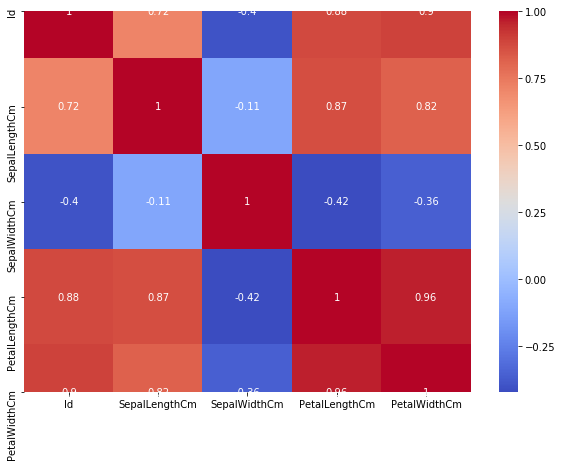

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(iris.corr(), annot=True, cmap = 'coolwarm')

In [10]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
sns.voilinplot('PetalWidthCm', 'Species', data = iris)

AttributeError: module 'seaborn' has no attribute 'voilinplot'

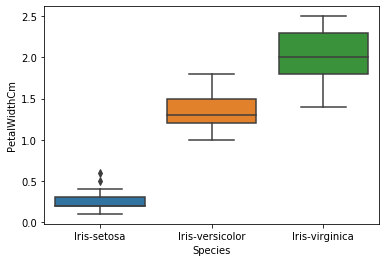

In [12]:
sns.boxplot('Species','PetalWidthCm', data = iris)

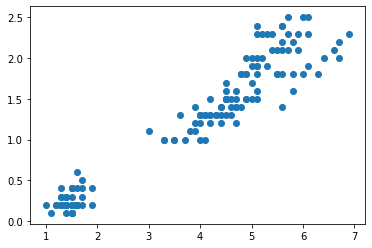

In [13]:
plt.scatter('PetalLengthCm', 'PetalWidthCm', data=iris)

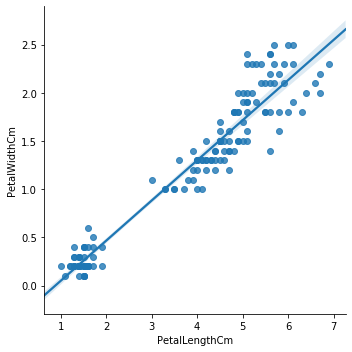

In [14]:
sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=iris)

TypeError: cannot perform reduce with flexible type

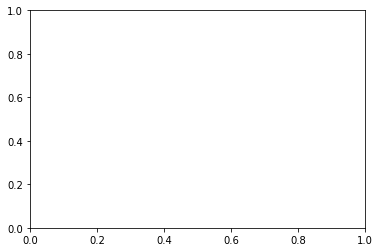

In [15]:
sns.distplot(['PetalLengthCm'])

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
model = LogisticRegression()


In [18]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [20]:
y = iris['Species']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [24]:
model.fit(X_train, y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = model.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [59]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 14  2]
 [ 0  0 14]]


In [28]:
print("The accuracy of the model is:", accuracy_score(y_test, y_pred))

The accuracy of the model is: 0.9555555555555556


### Nave bayes Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
nb = GaussianNB()

In [34]:
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
y_predict = model.predict(X_test)

In [58]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [55]:
confusion_matrix(y_test, y_predict)

array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 14]])

In [57]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [52]:
print("The accuracy of the model is:", accuracy_score(y_test, y_pred))

The accuracy of the model is: 0.9555555555555556


### Random Forest classifier

In [68]:
rfc = RandomForestClassifier()

In [69]:
rfc.fit(X_train, y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
y_rfc = rfc.predict(X_test)

In [72]:
print(classification_report(y_test, y_rfc))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.79      0.94      0.86        16
 Iris-virginica       0.91      0.71      0.80        14

       accuracy                           0.89        45
      macro avg       0.90      0.88      0.89        45
   weighted avg       0.90      0.89      0.89        45



In [73]:
print(confusion_matrix(y_test, y_rfc))

[[15  0  0]
 [ 0 15  1]
 [ 0  4 10]]


In [74]:
print("The accuracy of the model is:", accuracy_score(y_test, y_rfc))

The accuracy of the model is: 0.8888888888888888


### K Neighbors Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
KNN = KNeighborsClassifier()

In [77]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
y_KNN = model.predict(X_test)

In [79]:
print(classification_report(y_test, y_KNN))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [81]:
print(confusion_matrix(y_test, y_KNN))

[[15  0  0]
 [ 0 14  2]
 [ 0  0 14]]


In [82]:
print("The accuracy of the model is:", accuracy_score(y_test, y_KNN))

The accuracy of the model is: 0.9555555555555556


In [83]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
from sklearn.metrics import r2_score # This only works regression problems

### Decision Tree Classifier

In [40]:
dtc = DecisionTreeClassifier()

In [42]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
y_predicted = dtc.predict(X_test)

In [65]:
print(classification_report(y_test, y_predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.92      0.79      0.85        14

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.91      0.91      0.91        45



In [66]:
print(confusion_matrix(y_test,y_predicted))

[[15  0  0]
 [ 0 15  1]
 [ 0  3 11]]


In [67]:
print("The accuracy of the model is:", accuracy_score(y_test, y_predicted))

The accuracy of the model is: 0.9111111111111111


### Linear Discriminant Analysis

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [88]:
model = LinearDiscriminantAnalysis()

In [90]:
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [91]:
y_discriminant = model.predict(X_test)

In [92]:
print(classification_report(y_test, y_discriminant))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [93]:
print(confusion_matrix(y_pred, y_discriminant))

[[15  0  0]
 [ 0 14  0]
 [ 0  1 15]]


In [94]:
print("The accuracy of the model is:", accuracy_score(y_test, y_discriminant))

The accuracy of the model is: 0.9777777777777777
